# Visualization

The resulting visualization will show two UMAP plots:
	•	Left Plot: Original cell types from celltype.
	•	Right Plot: Predicted cell types from predictions.

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
projectDir = Path(f"/tscc/nfs/home/s5srinivasan/scgpt-project/scGPT-ucsd-fork")

# Load your .h5ad file
predictedDataPath = Path(projectDir/f"data/covid/predictions_wilk_10_epochs.h5ad")
wilkData = sc.read_h5ad(predictedDataPath)

# Nearest neighbor graph constuction and visualization

1.	Compute PCA: UMAP requires a reduced representation of the data. ```sc.tl.pca``` computes principal components (default: 50 PCs).
2.	Compute Neighbors: ```sc.pp.neighbors``` calculates a neighborhood graph based on PCA-reduced data. This is required before running UMAP.
3.	Compute UMAP: ```sc.tl.umap``` generates UMAP embeddings using the neighbors graph.
4.	Sanity Checking Columns: Ensure the celltype and predictions columns exist before proceeding.



In [4]:
if 'X_umap' not in wilkData.obsm: # Check if UMAP embeddings are present - NOT PRESENT 
    if 'neighbors' not in wilkData.uns:  # Check if neighbors are already computed - NOT PRESENT
        
        # Compute neighbors using PCA (default)
        sc.tl.pca(wilkData)  # Compute PCA if not already done
        sc.pp.neighbors(wilkData)  # Compute neighbors
        
    # Compute UMAP
    sc.tl.umap(wilkData)

# Ensure the two columns exist in wilkData.obs
if 'celltype' not in wilkData.obs or 'predictions' not in wilkData.obs:
    raise ValueError("The specified columns 'celltype' and 'predictions' do not exist in wilkData.obs")

In [11]:
save_dir = Path(projectDir/"save/dev_covid-Nov29-10epochs_wilk")

In [12]:
celltypes = wilkData.obs["celltype"].unique()

# plot
palette_ = plt.rcParams["axes.prop_cycle"].by_key()["color"] 
palette_ = plt.rcParams["axes.prop_cycle"].by_key()["color"] + plt.rcParams["axes.prop_cycle"].by_key()["color"] + plt.rcParams["axes.prop_cycle"].by_key()["color"]
palette_ = {c: palette_[i] for i, c in enumerate(celltypes)}

NameError: name 'predictions' is not defined

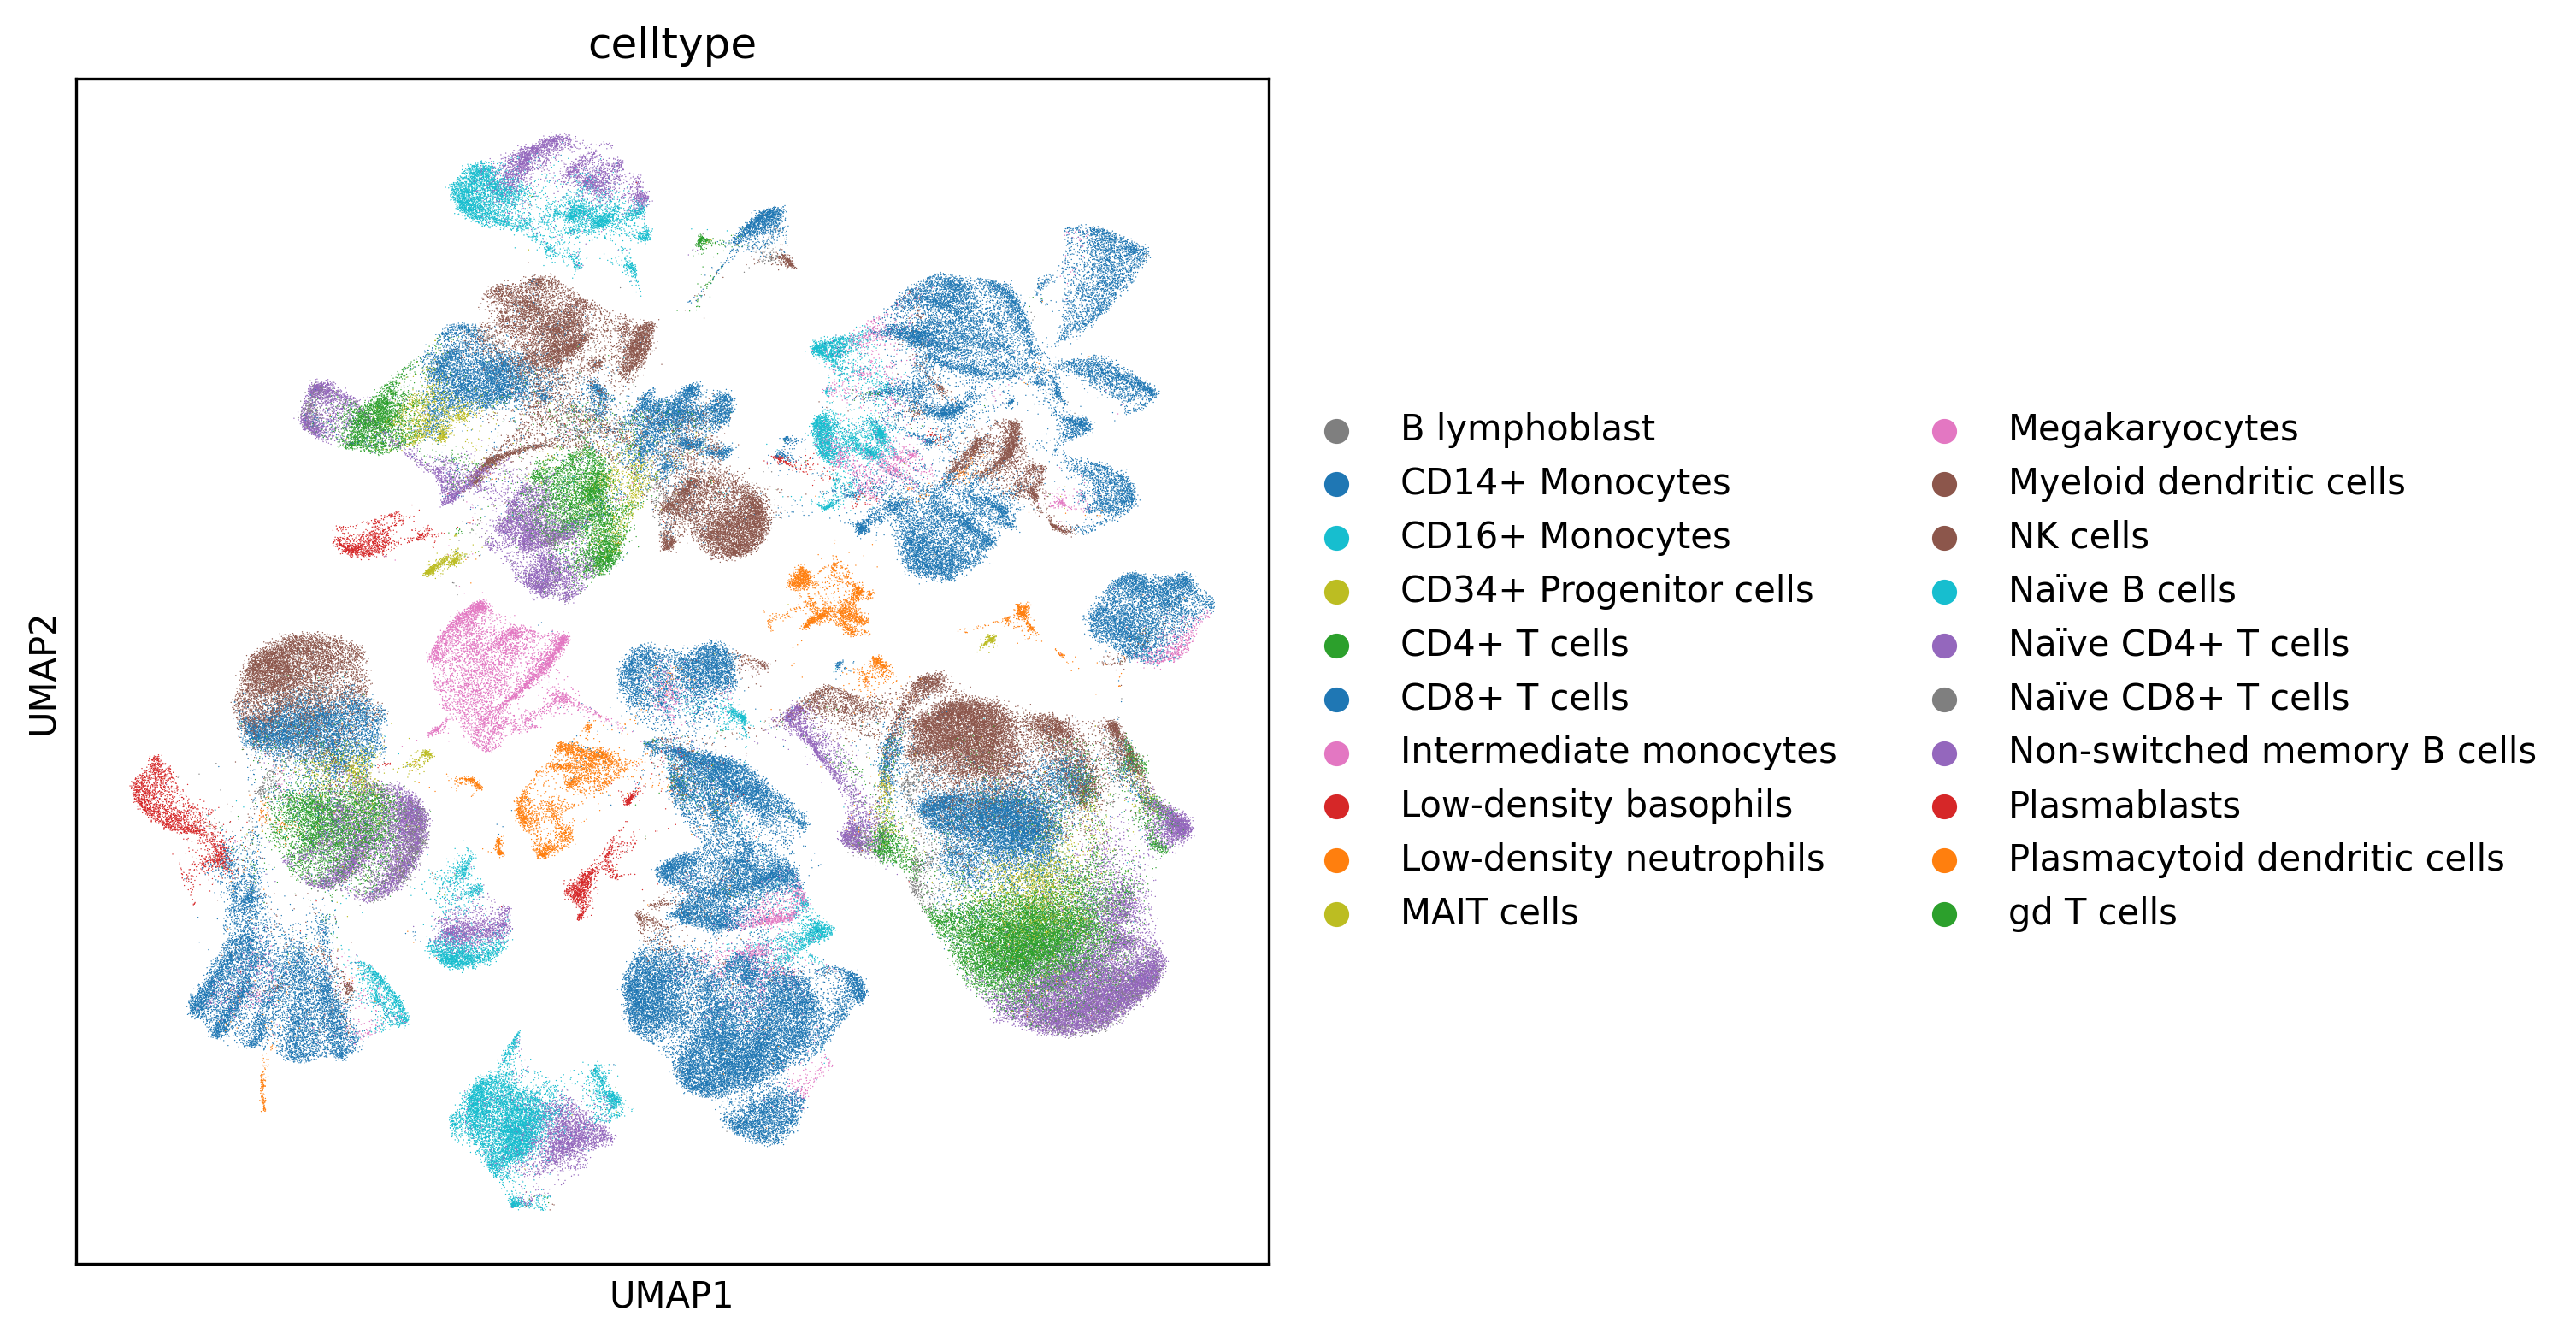

In [16]:
with plt.rc_context({"figure.figsize": (6, 6), "figure.dpi": (300)}):
    
    sc.pl.umap(
        wilkData,
        color=["celltype"],
        palette=palette_,
        show=False,
    )
    plt.savefig(save_dir / "results.png", dpi=300)

save_dict = {
    "predictions": predictions,
    "labels": labels,
    "results": results,
    "id_maps": id2type
}


with open(save_dir / "results.pkl", "wb") as f:
    pickle.dump(save_dict, f)

results["test/cell_umap"] = wandb.Image(
    str(save_dir / "results.png"),
    caption=f"predictions macro f1 {results['test/macro_f1']:.3f}",
)
wandb.log(results)


NameError: name 'predictions' is not defined

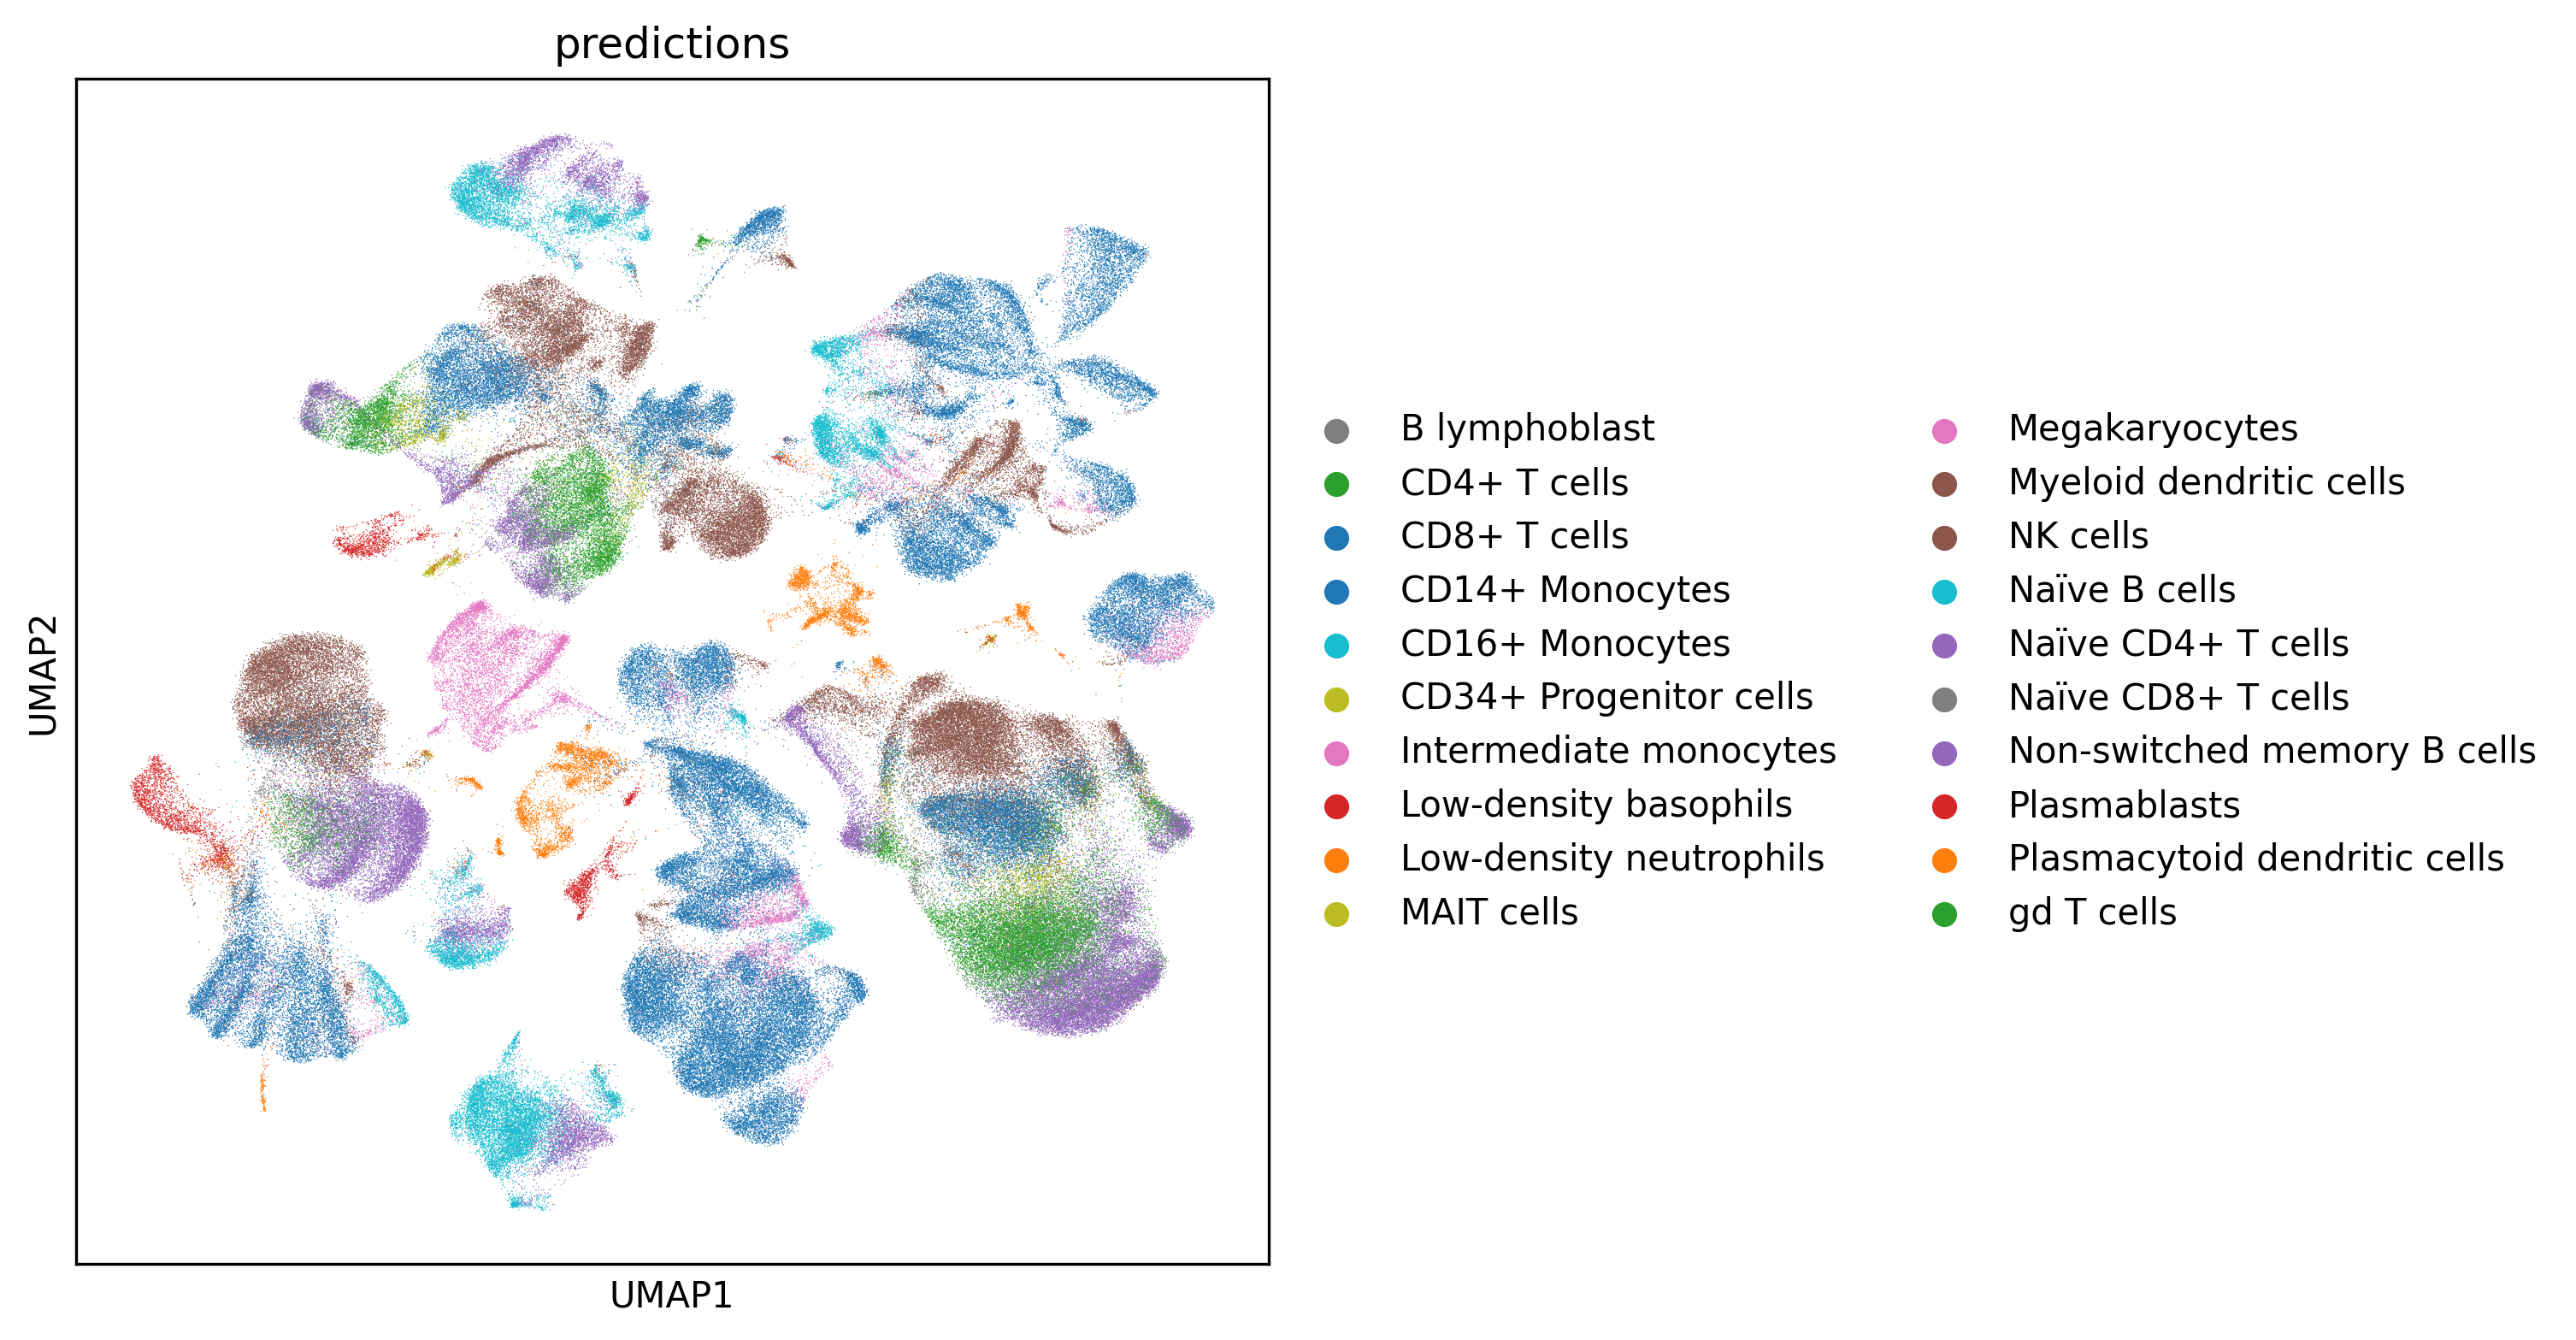

In [17]:
with plt.rc_context({"figure.figsize": (6, 6), "figure.dpi": (300)}):
    
    sc.pl.umap(
        wilkData,
        color=["predictions"],
        palette=palette_,
        show=False,
    )
    plt.savefig(save_dir / "results.png", dpi=300)

save_dict = {
    "predictions": predictions,
    "labels": labels,
    "results": results,
    "id_maps": id2type
}


with open(save_dir / "results.pkl", "wb") as f:
    pickle.dump(save_dict, f)

results["test/cell_umap"] = wandb.Image(
    str(save_dir / "results.png"),
    caption=f"predictions macro f1 {results['test/macro_f1']:.3f}",
)
wandb.log(results)

In [19]:
wilkData.write_h5ad(projectDir/'data/covid/wilkData_neighbors.h5ad')

In [ ]:
from sklearn.metrics import confusion_matrix

celltypes = list(celltypes)
for i in set([id2type[p] for p in predictions]):
    if i not in celltypes:
        celltypes.remove(i)
cm = confusion_matrix(labels, predictions)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
cm = pd.DataFrame(cm, index=celltypes[:cm.shape[0]], columns=celltypes[:cm.shape[1]])
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
plt.savefig(save_dir / "confusion_matrix.png", dpi=300)

results["test/confusion_matrix"] = wandb.Image(
    str(save_dir / "confusion_matrix.png"),
    caption=f"confusion matrix",
)